In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
place = pd.read_csv('tourism_with_id.csv')
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
# Membuang kolom yang tidak dipakai

place = place.drop(['Place_Id','Place_Name','Description','Price','Rating','Time_Minutes','Coordinate','Unnamed: 11','Unnamed: 12'],axis=1)
place.head()

,Category,City,Lat,Long
0,Budaya,Jakarta,-6.175392,106.827153
1,Budaya,Jakarta,-6.137645,106.817125
2,Taman Hiburan,Jakarta,-6.125312,106.833538
3,Taman Hiburan,Jakarta,-6.302446,106.895156
4,Taman Hiburan,Jakarta,-6.124190,106.839134


In [ ]:
place_norm = place.copy()
scaler = preprocessing.MinMaxScaler()
place_norm[['Lat','Long']] = scaler.fit_transform(place_norm[['Lat','Long']])
place_norm = pd.get_dummies(place_norm, columns=["Category","City"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

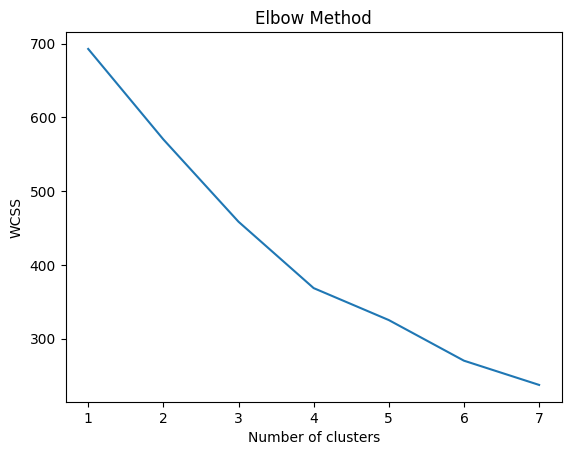

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already preprocessed your data and stored it in `place_norm`

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(place_norm)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(place_norm)
labels = pd.DataFrame(clusters)
labeledplace = pd.concat((place,labels),axis=1)
labeledplace = labeledplace.rename({0:'Cluster'},axis=1)
labeledplace

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Category,City,Lat,Long,Cluster
0,Budaya,Jakarta,-6.175392,106.827153,3
1,Budaya,Jakarta,-6.137645,106.817125,3
2,Taman Hiburan,Jakarta,-6.125312,106.833538,3
3,Taman Hiburan,Jakarta,-6.302446,106.895156,3
4,Taman Hiburan,Jakarta,-6.124190,106.839134,3
...,...,...,...,...,...
432,Budaya,Surabaya,-7.433859,112.719906,1
433,Taman Hiburan,Surabaya,-7.291347,112.739822,1
434,Taman Hiburan,Surabaya,-7.275296,112.754938,1
435,Taman Hiburan,Surabaya,-7.294330,112.761753,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


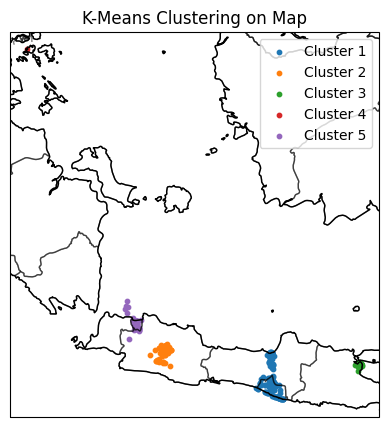

In [ ]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Read the dataset from the CSV file
place = pd.read_csv('tourism_with_id.csv')

# Drop unnecessary columns
place = place.drop(['Place_Id', 'Place_Name', 'Description', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

# Training the K-Means model on the dataset with the chosen number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(place[['Long', 'Lat']])

# Creating the map
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Drawing the coastline, countries, and states
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
ax.add_feature(cfeature.STATES, linestyle='-', alpha=0.5)

# Plotting the clusters on the map
for cluster_label in range(num_clusters):
    cluster_points = place.loc[y_kmeans == cluster_label, ['Long', 'Lat']]
    lon = cluster_points['Long'].tolist()
    lat = cluster_points['Lat'].tolist()
    ax.scatter(lon, lat, transform=ccrs.PlateCarree(), s=10, marker='o', alpha=1, label='Cluster {}'.format(cluster_label + 1))

plt.title('K-Means Clustering on Map')
plt.legend()
plt.show()